In [55]:
from Funcs.Utility import *
import numpy as np
import pandas as pd
from typing import Dict, Callable, Union, Tuple, List, Optional, Iterable
from datetime import timedelta as td
from scipy import stats
import ray
import warnings
import time
import ray
import dask

In [56]:
import pandas as pd
print(pd.__version__)

1.5.3


In [57]:
DATA = load(PATH_PROC_DATA)

In [58]:
DATA

{'ACC_AXX': pcode  timestamp                       
 P48    2019-05-16 10:31:36.122000+09:00    0.029541
        2019-05-16 10:31:36.262000+09:00    0.030029
        2019-05-16 10:31:36.382000+09:00    0.029297
        2019-05-16 10:31:36.525000+09:00    0.033691
        2019-05-16 10:31:36.651000+09:00    0.033691
                                              ...   
 P75    2019-05-06 22:01:01.595000+09:00   -0.378174
        2019-05-06 22:01:01.737000+09:00   -0.377197
        2019-05-06 22:01:01.877000+09:00   -0.379150
        2019-05-06 22:01:02.013000+09:00   -0.395264
        2019-05-06 22:01:02.136000+09:00   -0.400146
 Name: x, Length: 123260001, dtype: float32,
 'ACC_AXY': pcode  timestamp                       
 P48    2019-05-16 10:31:36.122000+09:00   -0.932373
        2019-05-16 10:31:36.262000+09:00   -0.931641
        2019-05-16 10:31:36.382000+09:00   -0.931885
        2019-05-16 10:31:36.525000+09:00   -0.930420
        2019-05-16 10:31:36.651000+09:00   -0.930908
   

In [59]:
if 'STP' in DATA:
    stp_data = DATA['STP']
else:
    raise KeyError("'STP' key not found in DATA")

In [60]:
def process_user_data(df):
    df = df.reset_index()  # Ensure index is reset to process correctly
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')
    
    print("DataFrame before resampling:")
    print(df.head())
    
    # Create the aggregation dictionary
    agg_dict = {col: 'last' for col in df.columns if col != 'steps'}
    agg_dict['steps'] = 'sum'
    
    print("Aggregation dictionary:")
    print(agg_dict)
    
    # Resample and aggregate
    resampled = df.resample('1H').agg(agg_dict)
    resampled['label'] = resampled['steps']
    
    print("DataFrame after resampling:")
    print(resampled.head())
    
    return resampled

In [61]:
# Create a list of delayed objects for each user's data
delayed_results = []
for pcode in stp_data.index.get_level_values(0).unique():
    df = stp_data.loc[pcode]
    delayed_result = dask.delayed(process_user_data)(df)
    delayed_results.append(delayed_result)

In [62]:
results = dask.compute(*delayed_results)

DataFrame before resampling:
                                  steps
timestamp                              
2019-05-16 09:00:01.511000+09:00    0.0
2019-05-16 09:00:02.489000+09:00    0.0
2019-05-16 09:00:03.514000+09:00    0.0
2019-05-16 09:00:04.525000+09:00    0.0
2019-05-16 09:00:05.531000+09:00    0.0
Aggregation dictionary:
{'steps': 'sum'}
DataFrame before resampling:
                                  steps
timestamp                              
2019-04-30 09:50:49.218000+09:00    0.0
2019-04-30 09:50:50.219000+09:00    0.0
2019-04-30 09:50:51.219000+09:00    0.0
2019-04-30 09:50:52.238000+09:00    0.0
2019-04-30 09:50:53.240000+09:00    0.0
Aggregation dictionary:
{'steps': 'sum'}
DataFrame before resampling:
                                  steps
timestamp                              
2019-05-08 09:00:01.340000+09:00    2.0
2019-05-08 09:00:02.342000+09:00    0.0
2019-05-08 09:00:03.333000+09:00    4.0
2019-05-08 09:00:04.357000+09:00    2.0
2019-05-08 09:00:05.377000+09:0

DataFrame before resampling:
                                  steps
timestamp                              
2019-04-30 09:00:01.632000+09:00    0.0
2019-04-30 09:00:02.653000+09:00    0.0
2019-04-30 09:00:03.660000+09:00    0.0
2019-04-30 09:00:04.641000+09:00    0.0
2019-04-30 09:00:05.668000+09:00    0.0
Aggregation dictionary:
{'steps': 'sum'}
DataFrame after resampling:
                           steps  label
timestamp                              
2019-05-16 13:00:00+09:00    0.0    0.0
2019-05-16 14:00:00+09:00  396.0  396.0
2019-05-16 15:00:00+09:00  204.0  204.0
2019-05-16 16:00:00+09:00  232.0  232.0
2019-05-16 17:00:00+09:00  368.0  368.0
DataFrame before resampling:
                                  steps
timestamp                              
2019-05-16 10:42:19.315000+09:00    0.0
2019-05-16 10:42:20.334000+09:00    0.0
2019-05-16 10:42:21.310000+09:00    0.0
2019-05-16 10:42:22.333000+09:00    0.0
2019-05-16 10:42:23.365000+09:00    0.0
Aggregation dictionary:
{'steps':

DataFrame before resampling:
                                  steps
timestamp                              
2019-04-30 13:01:36.733000+09:00    0.0
2019-04-30 13:01:37.886000+09:00    0.0
2019-04-30 13:01:38.400000+09:00    0.0
2019-04-30 13:01:39.682000+09:00    0.0
2019-04-30 13:01:41.039000+09:00    0.0
Aggregation dictionary:
{'steps': 'sum'}
DataFrame before resampling:
                                  steps
timestamp                              
2019-05-08 10:57:42.688000+09:00    0.0
2019-05-08 10:57:43.699000+09:00    0.0
2019-05-08 10:57:44.698000+09:00    0.0
2019-05-08 10:57:45.746000+09:00    0.0
2019-05-08 10:57:46.722000+09:00    0.0
Aggregation dictionary:
{'steps': 'sum'}
DataFrame after resampling:
                            steps   label
timestamp                                
2019-05-08 09:00:00+09:00    42.0    42.0
2019-05-08 10:00:00+09:00   140.0   140.0
2019-05-08 11:00:00+09:00   302.0   302.0
2019-05-08 12:00:00+09:00  1996.0  1996.0
2019-05-08 13:00:00+

DataFrame after resampling:
DataFrame after resampling:
DataFrame before resampling:
                                  steps
timestamp                              
2019-04-30 11:18:01.986000+09:00    0.0
2019-04-30 11:18:03.010000+09:00    0.0
2019-04-30 11:18:04.035000+09:00    0.0
2019-04-30 11:18:05.056000+09:00    0.0
2019-04-30 11:18:06.080000+09:00    0.0
Aggregation dictionary:
{'steps': 'sum'}
                            steps   label
timestamp                                
2019-05-08 17:00:00+09:00  2000.0  2000.0
2019-05-08 18:00:00+09:00  3352.0  3352.0
2019-05-08 19:00:00+09:00     0.0     0.0
2019-05-08 20:00:00+09:00     0.0     0.0
2019-05-08 21:00:00+09:00     0.0     0.0
DataFrame before resampling:
                                  steps
timestamp                              
2019-04-30 09:57:27.862000+09:00    0.0
2019-04-30 09:57:28.892000+09:00    0.0
2019-04-30 09:57:29.921000+09:00    0.0
2019-04-30 09:57:30.951000+09:00    0.0
2019-04-30 09:57:31.981000+09:0

DataFrame before resampling:
                                  steps
timestamp                              
2019-05-08 12:00:53.888000+09:00    0.0
2019-05-08 12:00:54.908000+09:00    0.0
2019-05-08 12:00:55.929000+09:00    0.0
2019-05-08 12:00:56.994000+09:00    0.0
2019-05-08 12:00:57.934000+09:00    0.0
Aggregation dictionary:
{'steps': 'sum'}
DataFrame before resampling:
                                  steps
timestamp                              
2019-05-16 09:49:32.057000+09:00    2.0
2019-05-16 09:49:33.061000+09:00    2.0
2019-05-16 09:49:34.077000+09:00    2.0
2019-05-16 09:49:35.094000+09:00    2.0
2019-05-16 09:49:36.108000+09:00    2.0
Aggregation dictionary:
{'steps': 'sum'}
DataFrame before resampling:
                                  steps
timestamp                              
2019-05-16 11:04:25.440000+09:00    0.0
2019-05-16 11:04:26.453000+09:00    0.0
2019-05-16 11:04:27.474000+09:00    0.0
2019-05-16 11:04:28.484000+09:00    0.0
2019-05-16 11:04:29.496000+09:0

In [63]:
combined_df = pd.concat(results, keys=stp_data.index.get_level_values(0).unique(), names=['pcode', 'timestamp'])

In [64]:
if 'steps' in combined_df.columns:
    combined_df.drop(columns=['steps'], inplace=True)

In [65]:
# Save the DataFrame with features and labels to a CSV file in the "intermediate" directory
output_path = os.path.join('Intermediate', 'labels_15h.csv')
os.makedirs(os.path.dirname(output_path), exist_ok=True)
combined_df.to_csv(output_path)

In [66]:
print(combined_df.head())

                                  label
pcode timestamp                        
P48   2019-05-16 10:00:00+09:00   200.0
      2019-05-16 11:00:00+09:00    82.0
      2019-05-16 12:00:00+09:00   134.0
      2019-05-16 13:00:00+09:00   488.0
      2019-05-16 14:00:00+09:00  1850.0


EDA

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:

# Load the labels data
path_labels = os.path.join('Intermediate', 'labels_15h.csv')
labels_df = pd.read_csv(path_labels)

# Display the first few rows
print(labels_df.head())

  pcode                  timestamp   label
0   P48  2019-05-16 10:00:00+09:00   200.0
1   P48  2019-05-16 11:00:00+09:00    82.0
2   P48  2019-05-16 12:00:00+09:00   134.0
3   P48  2019-05-16 13:00:00+09:00   488.0
4   P48  2019-05-16 14:00:00+09:00  1850.0


In [69]:
# Display basic statistics
print(labels_df.describe())

              label
count  11522.000000
mean     253.845166
std      582.900588
min        0.000000
25%        0.000000
50%        0.000000
75%      193.500000
max     8834.000000


In [70]:
# Check for missing values
print(labels_df.isnull().sum())

pcode        0
timestamp    0
label        0
dtype: int64


In [71]:
labels_df['label'] = pd.to_numeric(labels_df['label'], errors='coerce')

In [72]:
finite_mask = np.isfinite(labels_df['label'])
if not finite_mask.all():
    print("Non-finite values detected and removed.")
    labels_df = labels_df[finite_mask]

In [73]:
# Count the number of zeros in the 'label' column
zero_count = (labels_df['label'] == 0).sum()
print(zero_count)

7548


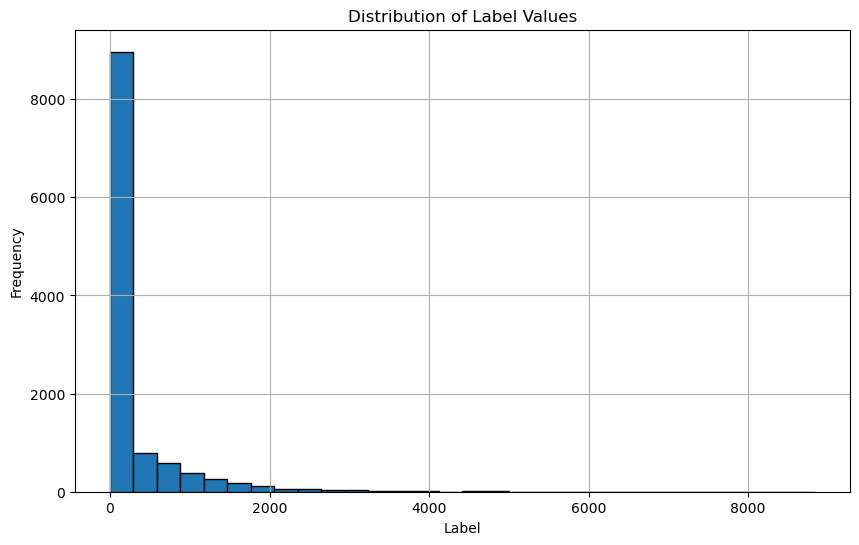

In [74]:
# Plotting the distribution of the label values
plt.figure(figsize=(10, 6))
plt.hist(labels_df['label'], bins=30, edgecolor='black')
plt.title('Distribution of Label Values')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

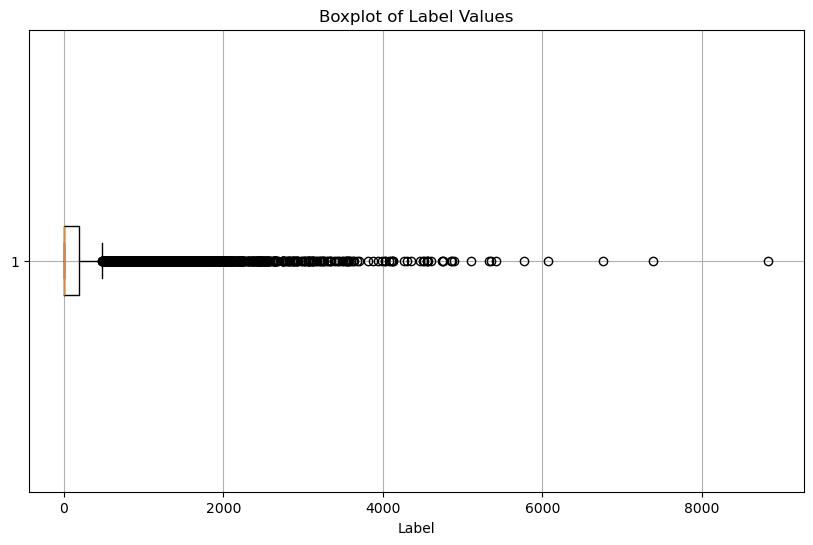

In [75]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(labels_df['label'].dropna(), vert=False)
plt.title('Boxplot of Label Values')
plt.xlabel('Label')
plt.grid(True)
plt.show()

In [76]:
# Remove upper outliers for each pcode
def remove_top_5_percent(group):
    upper_bound = group['label'].quantile(0.95)
    return group[group['label'] <= upper_bound]

In [77]:
filtered_df = labels_df.groupby('pcode').apply(remove_top_5_percent).reset_index(drop=True)

In [78]:
filtered_df

,pcode,timestamp,label
0,P01,2019-05-08 10:00:00+09:00,324.0
1,P01,2019-05-08 11:00:00+09:00,668.0
2,P01,2019-05-08 12:00:00+09:00,100.0
3,P01,2019-05-08 13:00:00+09:00,66.0
4,P01,2019-05-08 14:00:00+09:00,332.0
...,...,...,...
10922,P80,2019-05-06 18:00:00+09:00,0.0
10923,P80,2019-05-06 19:00:00+09:00,152.0
10924,P80,2019-05-06 20:00:00+09:00,0.0
10925,P80,2019-05-06 21:00:00+09:00,1172.0


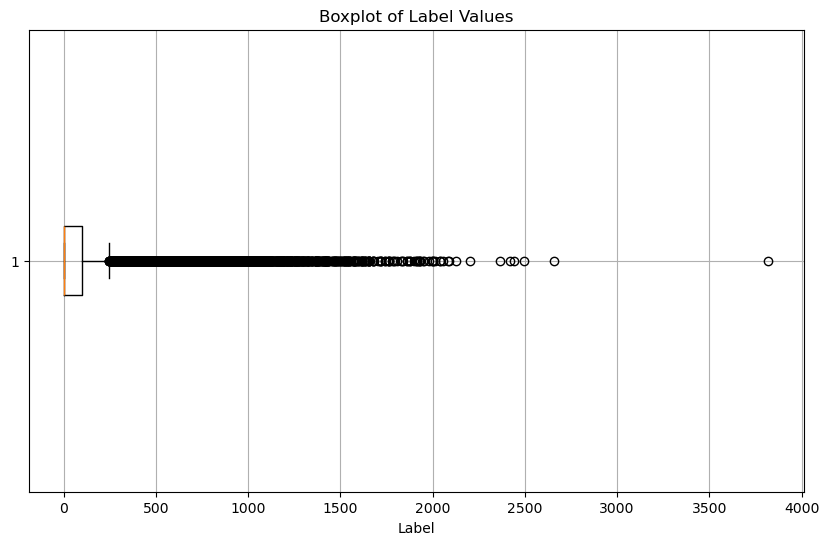

In [79]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['label'].dropna(), vert=False)
plt.title('Boxplot of Label Values')
plt.xlabel('Label')
plt.grid(True)
plt.show()

In [80]:
# Calculate personal means for each pcode
personal_means = filtered_df.groupby('pcode')['label'].mean().reset_index()
personal_means.columns = ['pcode', 'personal_mean']

In [81]:
merged_df = pd.merge(filtered_df, personal_means, on='pcode')

In [82]:
merged_df

,pcode,timestamp,label,personal_mean
0,P01,2019-05-08 10:00:00+09:00,324.0,97.594595
1,P01,2019-05-08 11:00:00+09:00,668.0,97.594595
2,P01,2019-05-08 12:00:00+09:00,100.0,97.594595
3,P01,2019-05-08 13:00:00+09:00,66.0,97.594595
4,P01,2019-05-08 14:00:00+09:00,332.0,97.594595
...,...,...,...,...
10922,P80,2019-05-06 18:00:00+09:00,0.0,148.857143
10923,P80,2019-05-06 19:00:00+09:00,152.0,148.857143
10924,P80,2019-05-06 20:00:00+09:00,0.0,148.857143
10925,P80,2019-05-06 21:00:00+09:00,1172.0,148.857143


In [83]:
merged_df['binarized_label'] = (merged_df['label'] > merged_df['personal_mean']).astype(int)

In [84]:
print(merged_df.head())

  pcode                  timestamp  label  personal_mean  binarized_label
0   P01  2019-05-08 10:00:00+09:00  324.0      97.594595                1
1   P01  2019-05-08 11:00:00+09:00  668.0      97.594595                1
2   P01  2019-05-08 12:00:00+09:00  100.0      97.594595                1
3   P01  2019-05-08 13:00:00+09:00   66.0      97.594595                0
4   P01  2019-05-08 14:00:00+09:00  332.0      97.594595                1


In [85]:
zero_count = (merged_df['binarized_label'] == 0).sum()
print(zero_count)

8467


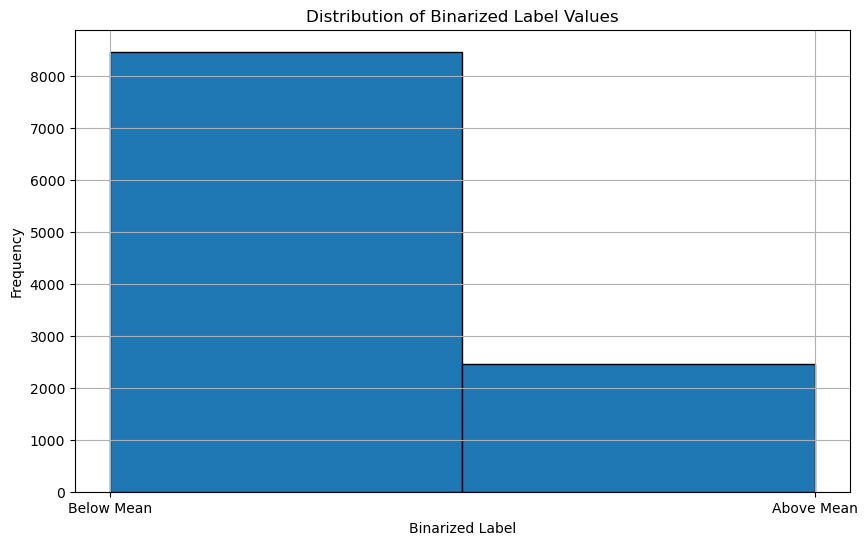

In [86]:
# Plot the distribution of the binarized labels
plt.figure(figsize=(10, 6))
plt.hist(merged_df['binarized_label'], bins=2, edgecolor='black')
plt.title('Distribution of Binarized Label Values')
plt.xlabel('Binarized Label')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Below Mean', 'Above Mean'])
plt.grid(True)
plt.show()